# Mushroom Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
columnlist = ['Category','Cap-Shape','Cap-Surface','Cap-Color','Bruises','Odor','Gill-attachment','Gill-Spacing','Gill-Size','Gill-Color',
           'Stalk-Shape','Stalk-Root','Stalk-Surface-Above-Ring','Stalk-Surface-Below-Ring','Stalk-Color-Above-Ring','Stalk-Color-Below-Ring',
           'Veil-Type','Veil-Color','Ring-Number','Ring-Type','Spore-Print-color','Population','Habitat']

df = pd.read_csv('agaricus-lepiota.csv',names = columnlist)
df.head(10)

,Category,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Type,Veil-Color,Ring-Number,Ring-Type,Spore-Print-color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# Data Summarization

In [3]:
df.describe()

,Category,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Type,Veil-Color,Ring-Number,Ring-Type,Spore-Print-color,Population,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  8124 non-null   object
 1   Cap-Shape                 8124 non-null   object
 2   Cap-Surface               8124 non-null   object
 3   Cap-Color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill-attachment           8124 non-null   object
 7   Gill-Spacing              8124 non-null   object
 8   Gill-Size                 8124 non-null   object
 9   Gill-Color                8124 non-null   object
 10  Stalk-Shape               8124 non-null   object
 11  Stalk-Root                8124 non-null   object
 12  Stalk-Surface-Above-Ring  8124 non-null   object
 13  Stalk-Surface-Below-Ring  8124 non-null   object
 14  Stalk-Color-Above-Ring  

# Data Visualization

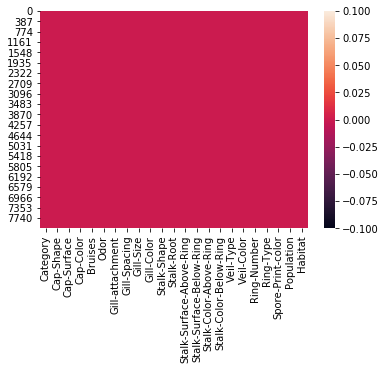

In [5]:
sns.heatmap(df.isnull())

No Null values are present.

# Data Manipulation 

In [6]:
#Missing Values in Stalk-Root are mentioned as '?'. We can drop the rows which have ? .
df = df[df['Stalk-Root']!='?']
df.shape

(5644, 23)

In [7]:
X = df.drop('Category',axis=1)
y = pd.DataFrame(df['Category'])
y.head()


,Category
0,p
1,e
2,e
3,p
4,e


In [8]:
# Encoding : 

from sklearn.preprocessing import LabelEncoder

X_encoded = pd.get_dummies(X)
X_encoded.head()

#0 is edible and 1 is poisonous
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y).reshape(-1,1)
y_encoded = pd.DataFrame(y_encoded)



In [9]:
#Since encoding lead to large number of columns for independent variables, we need to scale it using StandardScaler

X_encoded.describe()

,Cap-Shape_b,Cap-Shape_c,Cap-Shape_f,Cap-Shape_k,Cap-Shape_s,Cap-Shape_x,Cap-Surface_f,Cap-Surface_g,Cap-Surface_s,Cap-Surface_y,...,Population_n,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.053154,0.000709,0.430900,0.006378,0.005670,0.503189,0.382707,0.000709,0.223246,0.393338,...,0.045358,0.195606,0.382707,0.299079,0.441531,0.329554,0.011339,0.051736,0.100638,0.065202
std,0.224360,0.026615,0.495246,0.079617,0.075091,0.500034,0.486091,0.026615,0.416459,0.488534,...,0.208106,0.396702,0.486091,0.457895,0.496614,0.470093,0.105891,0.221514,0.300875,0.246904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mean < Standard deviation in most of the columns, hence it is left skewed data.

# Model Selection

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,f1_score
from sklearn.model_selection import train_test_split


max_r2_score=0
for i in range(0,201):
    x_train,x_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = lr.score(x_train,y_train)
    f1 = f1_score(y_test,y_pred)
    #print(i," : ", score)
    if score>max_r2_score:
        max_r2_score = score
        final_state = i
        final_f1 = f1
print("Best score for random state ",final_state," is : ",max_r2_score,". F1_Score is : ", final_f1)
    

Best score for random state  0  is :  1.0 . F1_Score is :  1.0


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=.20,random_state=42)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(lr.score(x_train,y_train))
print(f1_score(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

1.0
1.0
1.0
1.0


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()
parameters = {'C':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

grid_search = GridSearchCV(logistic,parameters,cv=10,scoring='f1',)
scores = cross_val_score(grid_search,X_encoded,y_encoded,cv=10,)

print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())


 Score :  [0.82608696 1.         1.         1.         1.         1.
 1.         0.98823529 0.997669   0.71398747]
 Mean :  0.952597872221235
 Standard Deviation :  0.09472229751886692


In [13]:
grid_search.fit(X_encoded,y_encoded)
grid_search.best_params_

{'C': 1}

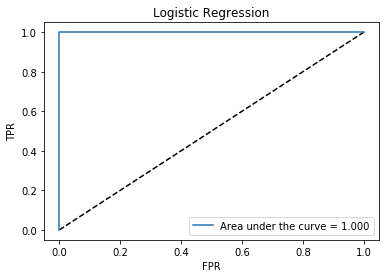

In [14]:
#AuC-ROC Curve :
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

final_model = LogisticRegression(C = 1)
final_model.fit(x_train,y_train)

y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,final_model.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,Label='Area under the curve = %0.3f'%auc_score)
plt.legend(loc = "lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression")
plt.show()

In [15]:
#Top 5 Factors that help in classifying the mushrooms as edible :
coefficients = pd.DataFrame(final_model.coef_,index=['Coefficients Value'])
coefficients.columns = X_encoded.columns
coeff_Array = coefficients.sort_values('Coefficients Value',axis=1,ascending=False)
coeff_Array.T.head()

,Coefficients Value
Odor_p,2.739505
Spore-Print-color_h,2.371728
Odor_f,2.371728
Odor_c,2.297431
Spore-Print-color_r,2.142653


In [16]:
#Top 5 Factors that help in classifying the mushrooms as poisonous :
coefficients = pd.DataFrame(final_model.coef_,index=['Coefficients Value'])
coefficients.columns = X_encoded.columns
coeff_Array = coefficients.sort_values('Coefficients Value',axis=1,ascending=True)
coeff_Array.T.head()

,Coefficients Value
Odor_n,-2.872204
Odor_l,-2.486397
Odor_a,-2.475440
Stalk-Shape_t,-1.427774
Gill-Size_b,-1.367877
